In [1]:

from google.colab import drive
drive.mount('/content/drive')
import os

#ROOT_PATH = "/content/drive/MyDrive/EPFL/optMLProject_Nicolas²_Oliver/" # Nicolas P.
#ROOT_PATH = "/content/drive/MyDrive/optMLProject_Nicolas²_Oliver/" # Nicolas B.
ROOT_PATH = "/content/drive/MyDrive/eigeneoptml" # Oliver D.

print(os.listdir(ROOT_PATH))


Mounted at /content/drive
['README.md', 'Hyperparameters Search.docx', 'more_info_hyperparameters_search.xlsx', 'hyperparameters_search.xlsx', 'optML.ipynb', 'data', 'utils', 'LION_resnet101.txt', 'report', 'SGD_resnet18.txt', 'SGDM_resnet18.txt', 'RMS_resnet18.txt', 'ADAM_resnet18.txt', 'LION_resnet18.txt', 'SGD_resnet101.txt', 'SGDM_resnet101.txt', 'RMS_resnet101.txt', 'ADAM_resnet101.txt', 'optML_evaluation.ipynb']


In [2]:
%load_ext autoreload
%autoreload 2

#Imports

import sys
sys.path.append(ROOT_PATH)

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

!pip install Lion_pytorch
from lion_pytorch import Lion

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


from utils import constants as cst
from utils import auxiliaries as aux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
'''
Load testing and training data
'''
training_set, test_set = aux.get_dataset()

training_loader = torch.utils.data.DataLoader(
    training_set, batch_size=cst.TRAIN_BATCH_SIZE
)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=cst.TEST_BATCH_SIZE
)


100%|██████████| 169001437/169001437 [00:01<00:00, 92962508.45it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


### ResNet18 Model

In [4]:
'''
SGD
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'SGD',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGD_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.03it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.21it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.27it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.24it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.75it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.43it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.61it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.59it/s]


Training Loss: [4.8805464744567875, 4.776530456542969, 4.78499755859375, 4.736792850494385, 4.692293643951416, 4.666815185546875, 4.624995422363281, 4.617720890045166, 4.579203414916992, 4.607166385650634, 4.562002658843994, 4.5460258483886715, 4.560989284515381, 4.494115161895752, 4.492991352081299, 4.44205150604248, 4.392067813873291, 4.433487415313721, 4.412812805175781, 4.348324871063232, 4.353024101257324, 4.301651191711426, 4.291568470001221, 4.259437370300293, 4.273076725006104, 4.239189910888672, 4.2362847328186035, 4.219016361236572, 4.184008598327637, 4.212330532073975, 4.240067863464356, 4.190766143798828, 4.108669567108154, 4.136710357666016, 4.135863304138184, 4.101048851013184, 4.146271514892578, 4.113685607910156, 4.084096431732178, 4.042887210845947, 4.033816719055176, 4.062986278533936, 4.037643051147461, 4.012518072128296, 4.0214262962341305, 3.9953418254852293, 3.9765047073364257, 3.9463696479797363, 4.0161858081817625, 3.9550507068634033, 3.997794246673584, 4.001982

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


Training Loss Array: [4.8805464744567875, 4.776530456542969, 4.78499755859375, 4.736792850494385, 4.692293643951416, 4.666815185546875, 4.624995422363281, 4.617720890045166, 4.579203414916992, 4.607166385650634, 4.562002658843994, 4.5460258483886715, 4.560989284515381, 4.494115161895752, 4.492991352081299, 4.44205150604248, 4.392067813873291, 4.433487415313721, 4.412812805175781, 4.348324871063232, 4.353024101257324, 4.301651191711426, 4.291568470001221, 4.259437370300293, 4.273076725006104, 4.239189910888672, 4.2362847328186035, 4.219016361236572, 4.184008598327637, 4.212330532073975, 4.240067863464356, 4.190766143798828, 4.108669567108154, 4.136710357666016, 4.135863304138184, 4.101048851013184, 4.146271514892578, 4.113685607910156, 4.084096431732178, 4.042887210845947, 4.033816719055176, 4.062986278533936, 4.037643051147461, 4.012518072128296, 4.0214262962341305, 3.9953418254852293, 3.9765047073364257, 3.9463696479797363, 4.0161858081817625, 3.9550507068634033, 3.997794246673584, 4.

In [5]:
'''
SGDM
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'SGDM',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGDM_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.67it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.66it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.59it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.25it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.09it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.27it/s]


Training Loss: [4.825204944610595, 4.690800952911377, 4.637413024902344, 4.5741472244262695, 4.449665069580078, 4.433650875091553, 4.283246040344238, 4.241183662414551, 4.16395845413208, 4.132747745513916, 4.109228706359863, 4.062115859985352, 4.084906053543091, 3.958926486968994, 4.053336048126221, 3.923040008544922, 3.855136585235596, 3.93322114944458, 3.90938777923584, 3.770860195159912, 3.7562490940093993, 3.6987537384033202, 3.763417673110962, 3.6989341259002684, 3.687347745895386, 3.642084503173828, 3.712178421020508, 3.6370561599731444, 3.6069299221038817, 3.6370254516601563, 3.7007729530334474, 3.6663880348205566, 3.565042018890381, 3.607187271118164, 3.6184106349945067, 3.5649365425109862, 3.552306652069092, 3.559942102432251, 3.5111664295196534, 3.5334435939788817, 3.48689227104187, 3.5104860782623293, 3.507327747344971, 3.4646296977996824, 3.4386696815490723, 3.430925416946411, 3.377265787124634, 3.3516644477844237, 3.3877299785614015, 3.3918506145477294, 3.361788749694824, 

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


Training Loss Array: [4.825204944610595, 4.690800952911377, 4.637413024902344, 4.5741472244262695, 4.449665069580078, 4.433650875091553, 4.283246040344238, 4.241183662414551, 4.16395845413208, 4.132747745513916, 4.109228706359863, 4.062115859985352, 4.084906053543091, 3.958926486968994, 4.053336048126221, 3.923040008544922, 3.855136585235596, 3.93322114944458, 3.90938777923584, 3.770860195159912, 3.7562490940093993, 3.6987537384033202, 3.763417673110962, 3.6989341259002684, 3.687347745895386, 3.642084503173828, 3.712178421020508, 3.6370561599731444, 3.6069299221038817, 3.6370254516601563, 3.7007729530334474, 3.6663880348205566, 3.565042018890381, 3.607187271118164, 3.6184106349945067, 3.5649365425109862, 3.552306652069092, 3.559942102432251, 3.5111664295196534, 3.5334435939788817, 3.48689227104187, 3.5104860782623293, 3.507327747344971, 3.4646296977996824, 3.4386696815490723, 3.430925416946411, 3.377265787124634, 3.3516644477844237, 3.3877299785614015, 3.3918506145477294, 3.36178874969

In [6]:
'''
RMS
'''
hyperparams = {
    'lr' : 0.0001,
    'weight_decay' : 1e-05,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'RMS',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'RMS_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.36it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.37it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.50it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.80it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.72it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.62it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.60it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.58it/s]


Training Loss: [4.7699480056762695, 4.725265979766846, 4.451947021484375, 4.317926216125488, 4.251617813110352, 4.185215759277344, 4.088380241394043, 3.9947015762329103, 3.941339111328125, 3.9399658203125, 3.9076615810394286, 3.8791996002197267, 3.89329047203064, 3.834264039993286, 3.8576729774475096, 3.781312942504883, 3.716808032989502, 3.771407413482666, 3.7729525566101074, 3.6224780082702637, 3.619004249572754, 3.5291301250457763, 3.6377437114715576, 3.5253591537475586, 3.5327523231506346, 3.5266494274139406, 3.556777334213257, 3.5353354454040526, 3.456020164489746, 3.4984898567199707, 3.560297632217407, 3.5181496143341064, 3.4524938106536864, 3.492946434020996, 3.4986545562744142, 3.441924285888672, 3.4174242973327638, 3.4076513290405273, 3.3737842559814455, 3.3795565128326417, 3.3390879154205324, 3.3805477142333986, 3.3910220146179197, 3.338619327545166, 3.3583021640777586, 3.2720477104187013, 3.1909369945526125, 3.2324347496032715, 3.252937984466553, 3.2344246387481688, 3.227047

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


Training Loss Array: [4.7699480056762695, 4.725265979766846, 4.451947021484375, 4.317926216125488, 4.251617813110352, 4.185215759277344, 4.088380241394043, 3.9947015762329103, 3.941339111328125, 3.9399658203125, 3.9076615810394286, 3.8791996002197267, 3.89329047203064, 3.834264039993286, 3.8576729774475096, 3.781312942504883, 3.716808032989502, 3.771407413482666, 3.7729525566101074, 3.6224780082702637, 3.619004249572754, 3.5291301250457763, 3.6377437114715576, 3.5253591537475586, 3.5327523231506346, 3.5266494274139406, 3.556777334213257, 3.5353354454040526, 3.456020164489746, 3.4984898567199707, 3.560297632217407, 3.5181496143341064, 3.4524938106536864, 3.492946434020996, 3.4986545562744142, 3.441924285888672, 3.4174242973327638, 3.4076513290405273, 3.3737842559814455, 3.3795565128326417, 3.3390879154205324, 3.3805477142333986, 3.3910220146179197, 3.338619327545166, 3.3583021640777586, 3.2720477104187013, 3.1909369945526125, 3.2324347496032715, 3.252937984466553, 3.2344246387481688, 3.

In [7]:
'''
ADAM
'''
hyperparams = {
    'lr' : 0.0003,
    'weight_decay' : 0.1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'ADAM',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'ADAM_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.19it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.48it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.57it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.55it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.71it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.63it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:25<00:00,  7.56it/s]


Training Loss: [4.826567935943603, 4.6643627166748045, 4.578732204437256, 4.485292243957519, 4.404923820495606, 4.350683975219726, 4.249101066589356, 4.20059986114502, 4.104779434204102, 4.14008674621582, 4.055477428436279, 4.0478719711303714, 4.0224402904510494, 3.912323474884033, 3.9550125122070314, 3.9046952724456787, 3.8436906337738037, 3.875235748291016, 3.882506275177002, 3.773916482925415, 3.7752571582794188, 3.6843828678131105, 3.7755128860473635, 3.6800469875335695, 3.656028652191162, 3.659959411621094, 3.7091634273529053, 3.666377401351929, 3.6141053676605224, 3.6448583602905273, 3.6947042465209963, 3.6500489711761475, 3.5955459117889403, 3.644741439819336, 3.6266763687133787, 3.596857786178589, 3.5787433624267577, 3.578971004486084, 3.4962141513824463, 3.5724937915802, 3.5036335945129395, 3.5943222045898438, 3.53534574508667, 3.5123895168304444, 3.529565620422363, 3.5141008853912354, 3.456119251251221, 3.442886161804199, 3.4386889934539795, 3.482100009918213, 3.4751422882080

Testing: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]


Training Loss Array: [4.826567935943603, 4.6643627166748045, 4.578732204437256, 4.485292243957519, 4.404923820495606, 4.350683975219726, 4.249101066589356, 4.20059986114502, 4.104779434204102, 4.14008674621582, 4.055477428436279, 4.0478719711303714, 4.0224402904510494, 3.912323474884033, 3.9550125122070314, 3.9046952724456787, 3.8436906337738037, 3.875235748291016, 3.882506275177002, 3.773916482925415, 3.7752571582794188, 3.6843828678131105, 3.7755128860473635, 3.6800469875335695, 3.656028652191162, 3.659959411621094, 3.7091634273529053, 3.666377401351929, 3.6141053676605224, 3.6448583602905273, 3.6947042465209963, 3.6500489711761475, 3.5955459117889403, 3.644741439819336, 3.6266763687133787, 3.596857786178589, 3.5787433624267577, 3.578971004486084, 3.4962141513824463, 3.5724937915802, 3.5036335945129395, 3.5943222045898438, 3.53534574508667, 3.5123895168304444, 3.529565620422363, 3.5141008853912354, 3.456119251251221, 3.442886161804199, 3.4386889934539795, 3.482100009918213, 3.4751422

In [8]:
'''
LION
'''
hyperparams = {
    'lr' : 0.0003,
    'weight_decay' : 1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet18', 'LION',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'LION_resnet18', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.46it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.41it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:27<00:00,  7.00it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.53it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.42it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.38it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.44it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:26<00:00,  7.45it/s]


Training Loss: [4.77340726852417, 4.607499599456787, 4.466318511962891, 4.350496578216553, 4.260114097595215, 4.17180643081665, 4.098141765594482, 4.017845726013183, 3.94545202255249, 3.953613805770874, 3.869244337081909, 3.9054916381835936, 3.8716518878936768, 3.737770986557007, 3.8174998283386232, 3.772838306427002, 3.6956289291381834, 3.7278750419616697, 3.7462183475494384, 3.6003299713134767, 3.6304674625396727, 3.5231664180755615, 3.6114559173583984, 3.5439602851867678, 3.5289386749267577, 3.5092029571533203, 3.578275680541992, 3.4742571830749513, 3.4248869895935057, 3.491067314147949, 3.4937523365020753, 3.446261930465698, 3.3928221225738526, 3.4608936309814453, 3.4157549381256103, 3.3762990474700927, 3.3426570892333984, 3.3486369132995604, 3.29980263710022, 3.355806064605713, 3.2961430072784426, 3.2647241592407226, 3.330998659133911, 3.2827127456665037, 3.307687759399414, 3.2860552310943603, 3.19032244682312, 3.1674542903900145, 3.231364440917969, 3.216761827468872, 3.1986764430

Testing: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


Training Loss Array: [4.77340726852417, 4.607499599456787, 4.466318511962891, 4.350496578216553, 4.260114097595215, 4.17180643081665, 4.098141765594482, 4.017845726013183, 3.94545202255249, 3.953613805770874, 3.869244337081909, 3.9054916381835936, 3.8716518878936768, 3.737770986557007, 3.8174998283386232, 3.772838306427002, 3.6956289291381834, 3.7278750419616697, 3.7462183475494384, 3.6003299713134767, 3.6304674625396727, 3.5231664180755615, 3.6114559173583984, 3.5439602851867678, 3.5289386749267577, 3.5092029571533203, 3.578275680541992, 3.4742571830749513, 3.4248869895935057, 3.491067314147949, 3.4937523365020753, 3.446261930465698, 3.3928221225738526, 3.4608936309814453, 3.4157549381256103, 3.3762990474700927, 3.3426570892333984, 3.3486369132995604, 3.29980263710022, 3.355806064605713, 3.2961430072784426, 3.2647241592407226, 3.330998659133911, 3.2827127456665037, 3.307687759399414, 3.2860552310943603, 3.19032244682312, 3.1674542903900145, 3.231364440917969, 3.216761827468872, 3.1986

## Evaluation of ResNet18

In [9]:
#load SGD Data
SGD_results = aux.load_results('SGD_resnet18', ROOT_PATH)
SGDM_results = aux.load_results('SGDM_resnet18', ROOT_PATH)
RMS_results = aux.load_results('RMS_resnet18', ROOT_PATH)
ADAM_results = aux.load_results('ADAM_resnet18', ROOT_PATH)
LION_results = aux.load_results('LION_resnet18', ROOT_PATH)

results18 = [SGD_results, SGDM_results, RMS_results, ADAM_results, LION_results]
optimizers = ['SGD','SGDM','RMS','ADAM','LION']

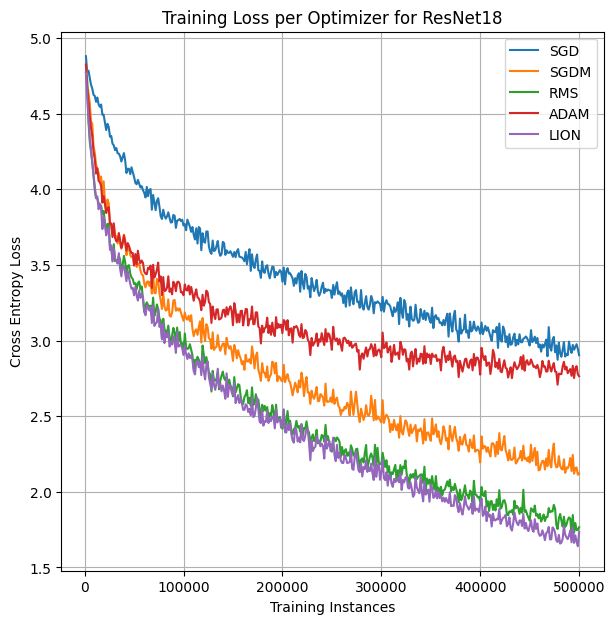

In [10]:
#Plot the training loss for each optimizer
fig, axs = plt.subplots(figsize=(7,7))
[axs.plot(a['trained_examples'], a['train_loss']) for a in results18]
axs.legend(optimizers)
axs.set_xlabel('Training Instances')
axs.set_ylabel('Cross Entropy Loss')
axs.grid()
axs.set_title("Training Loss per Optimizer for ResNet18")
fig.show()

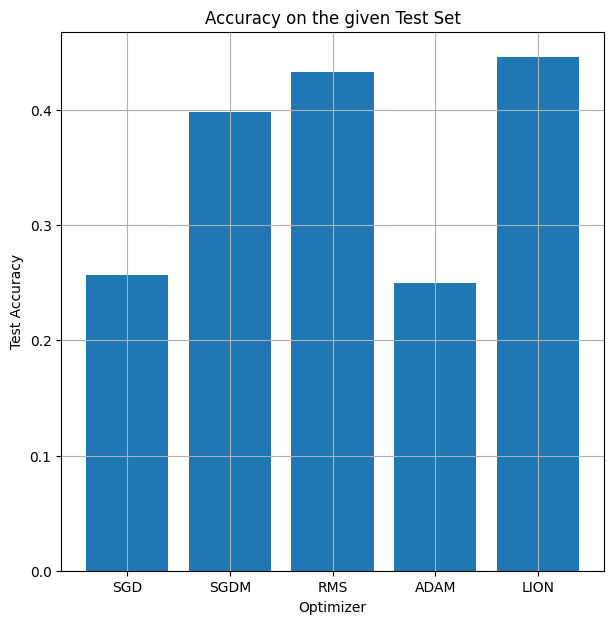

In [11]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['acc'] for a in results18])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Test Accuracy')
axs.grid()
axs.set_title("Accuracy on the given Test Set")
fig.show()

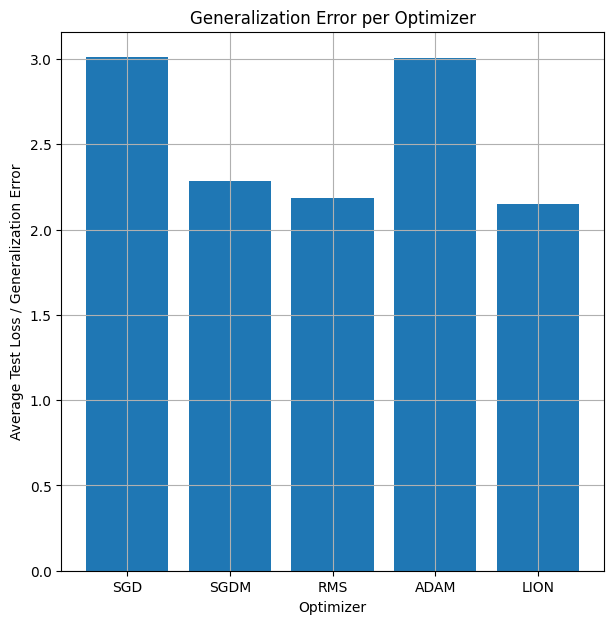

In [12]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['test_loss'] for a in results18])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Test Loss / Generalization Error')
axs.grid()
axs.set_title("Generalization Error per Optimizer")
fig.show()

## ResNet101 Model

In [13]:
'''
SGD
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.05
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'SGD',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGD_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.47it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:34<00:00,  5.66it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.48it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.45it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.50it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.52it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.46it/s]


Training Loss: [4.891819953918457, 4.789396953582764, 4.785979747772217, 4.769641876220703, 4.793216800689697, 4.762454700469971, 4.710098457336426, 4.7301380157470705, 4.802964496612549, 4.724424743652344, 4.734005260467529, 4.75097017288208, 4.7168937683105465, 4.686430835723877, 4.719336986541748, 4.669348812103271, 4.676646137237549, 4.699126529693603, 4.729606819152832, 4.686681842803955, 4.6560591697692875, 4.647229480743408, 4.633406639099121, 4.6749749183654785, 4.65073823928833, 4.643414783477783, 4.617306423187256, 4.629104518890381, 4.616498374938965, 4.610619068145752, 4.649913883209228, 4.604294776916504, 4.574350738525391, 4.625133609771728, 4.573636150360107, 4.5631608963012695, 4.578233337402343, 4.567536354064941, 4.5639372825622555, 4.575480651855469, 4.558456230163574, 4.588190746307373, 4.537793731689453, 4.564986228942871, 4.505814552307129, 4.4835405349731445, 4.47483606338501, 4.504345989227295, 4.48903169631958, 4.471053695678711, 4.4797515869140625, 4.438078117

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

Training Loss Array: [4.891819953918457, 4.789396953582764, 4.785979747772217, 4.769641876220703, 4.793216800689697, 4.762454700469971, 4.710098457336426, 4.7301380157470705, 4.802964496612549, 4.724424743652344, 4.734005260467529, 4.75097017288208, 4.7168937683105465, 4.686430835723877, 4.719336986541748, 4.669348812103271, 4.676646137237549, 4.699126529693603, 4.729606819152832, 4.686681842803955, 4.6560591697692875, 4.647229480743408, 4.633406639099121, 4.6749749183654785, 4.65073823928833, 4.643414783477783, 4.617306423187256, 4.629104518890381, 4.616498374938965, 4.610619068145752, 4.649913883209228, 4.604294776916504, 4.574350738525391, 4.625133609771728, 4.573636150360107, 4.5631608963012695, 4.578233337402343, 4.567536354064941, 4.5639372825622555, 4.575480651855469, 4.558456230163574, 4.588190746307373, 4.537793731689453, 4.564986228942871, 4.505814552307129, 4.4835405349731445, 4.47483606338501, 4.504345989227295, 4.48903169631958, 4.471053695678711, 4.4797515869140625, 4.438

In [14]:
'''
SGDM
'''
hyperparams = {
    'lr' : 0.01,
    'weight_decay' : 0.005,
    'momentum' : 0.9
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'SGDM',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'SGDM_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.41it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.45it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.42it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.37it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.45it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.40it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:35<00:00,  5.54it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.39it/s]


Training Loss: [4.930736637115478, 5.0105462074279785, 5.1417436599731445, 5.258953857421875, 5.590565395355225, 5.2992369651794435, 5.11814661026001, 5.04122371673584, 5.023090839385986, 5.052837753295899, 4.862295341491699, 4.73234453201294, 4.618380069732666, 4.642796993255615, 4.741908264160156, 4.517287731170654, 4.556721591949463, 4.663834953308106, 4.577017116546631, 4.434052658081055, 4.352860736846924, 4.314617729187011, 4.29347505569458, 4.250792026519775, 4.199947452545166, 4.2189428329467775, 4.2167047500610355, 4.250813770294189, 4.201535701751709, 4.224839210510254, 4.223727226257324, 4.221900558471679, 4.074879169464111, 4.166196537017822, 4.173218059539795, 4.160823154449463, 4.1803772926330565, 4.220292568206787, 4.073682880401611, 4.200721359252929, 4.1119438171386715, 4.170030784606934, 4.117324256896973, 4.110099411010742, 4.1671857833862305, 4.044484090805054, 4.013116550445557, 4.023568201065063, 4.065132999420166, 3.96027250289917, 4.021693277359009, 4.0338963508

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


Training Loss Array: [4.930736637115478, 5.0105462074279785, 5.1417436599731445, 5.258953857421875, 5.590565395355225, 5.2992369651794435, 5.11814661026001, 5.04122371673584, 5.023090839385986, 5.052837753295899, 4.862295341491699, 4.73234453201294, 4.618380069732666, 4.642796993255615, 4.741908264160156, 4.517287731170654, 4.556721591949463, 4.663834953308106, 4.577017116546631, 4.434052658081055, 4.352860736846924, 4.314617729187011, 4.29347505569458, 4.250792026519775, 4.199947452545166, 4.2189428329467775, 4.2167047500610355, 4.250813770294189, 4.201535701751709, 4.224839210510254, 4.223727226257324, 4.221900558471679, 4.074879169464111, 4.166196537017822, 4.173218059539795, 4.160823154449463, 4.1803772926330565, 4.220292568206787, 4.073682880401611, 4.200721359252929, 4.1119438171386715, 4.170030784606934, 4.117324256896973, 4.110099411010742, 4.1671857833862305, 4.044484090805054, 4.013116550445557, 4.023568201065063, 4.065132999420166, 3.96027250289917, 4.021693277359009, 4.0338

In [15]:
'''
RMS
'''
hyperparams = {
    'lr' : 1e-05,
    'weight_decay' : 1e-06,
    'momentum' : 0.95
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'RMS',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'RMS_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.19it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.38it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.28it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.26it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.32it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.33it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.26it/s]


Training Loss: [4.949461364746094, 5.004149913787842, 4.986008071899414, 4.835724639892578, 4.787006378173828, 4.8288885116577145, 4.761958980560303, 4.6705002784729, 4.675474071502686, 4.678434181213379, 4.587086868286133, 4.613750171661377, 4.60938196182251, 4.579020023345947, 4.551898670196533, 4.533874130249023, 4.508396816253662, 4.475470924377442, 4.4485899925231935, 4.432384586334228, 4.3911745071411135, 4.382673263549805, 4.362957954406738, 4.359515953063965, 4.335387897491455, 4.337535095214844, 4.3519362449646, 4.339085865020752, 4.2780743598937985, 4.2943462371826175, 4.320105838775635, 4.2426248550415036, 4.222354793548584, 4.229393005371094, 4.233606052398682, 4.280630302429199, 4.24189977645874, 4.1980881690979, 4.17754602432251, 4.151103973388672, 4.170968818664551, 4.165970802307129, 4.155099105834961, 4.191389179229736, 4.170858573913574, 4.12937183380127, 4.138841915130615, 4.094877433776856, 4.144251155853271, 4.087407112121582, 4.1511125564575195, 4.098258924484253,

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


Training Loss Array: [4.949461364746094, 5.004149913787842, 4.986008071899414, 4.835724639892578, 4.787006378173828, 4.8288885116577145, 4.761958980560303, 4.6705002784729, 4.675474071502686, 4.678434181213379, 4.587086868286133, 4.613750171661377, 4.60938196182251, 4.579020023345947, 4.551898670196533, 4.533874130249023, 4.508396816253662, 4.475470924377442, 4.4485899925231935, 4.432384586334228, 4.3911745071411135, 4.382673263549805, 4.362957954406738, 4.359515953063965, 4.335387897491455, 4.337535095214844, 4.3519362449646, 4.339085865020752, 4.2780743598937985, 4.2943462371826175, 4.320105838775635, 4.2426248550415036, 4.222354793548584, 4.229393005371094, 4.233606052398682, 4.280630302429199, 4.24189977645874, 4.1980881690979, 4.17754602432251, 4.151103973388672, 4.170968818664551, 4.165970802307129, 4.155099105834961, 4.191389179229736, 4.170858573913574, 4.12937183380127, 4.138841915130615, 4.094877433776856, 4.144251155853271, 4.087407112121582, 4.1511125564575195, 4.0982589244

In [16]:
'''
ADAM
'''
hyperparams = {
    'lr' : 9.5e-05,
    'weight_decay' : 0.05
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'ADAM',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'ADAM_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.04it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.23it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.27it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.26it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.21it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.20it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:36<00:00,  5.30it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:37<00:00,  5.24it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:38<00:00,  5.10it/s]


Training Loss: [4.886172199249268, 4.849833965301514, 4.7795638084411625, 4.778202629089355, 4.789775371551514, 4.799120998382568, 4.758148288726806, 4.7491191864013675, 4.745346450805664, 4.759156036376953, 4.758465766906738, 4.712056255340576, 4.71595573425293, 4.717731857299805, 4.7195484161376955, 4.673773670196534, 4.687812805175781, 4.69381685256958, 4.678629970550537, 4.728809642791748, 4.6903914451599125, 4.670152473449707, 4.71107063293457, 4.641799831390381, 4.641843509674072, 4.6795838356018065, 4.643927192687988, 4.659798049926758, 4.650887107849121, 4.662050056457519, 4.669179439544678, 4.674079322814942, 4.639400577545166, 4.655557155609131, 4.676496410369873, 4.619998550415039, 4.656620025634766, 4.6184686660766605, 4.635899353027344, 4.631457901000976, 4.605689239501953, 4.641317558288574, 4.611302471160888, 4.637581539154053, 4.604894924163818, 4.589194011688233, 4.601495552062988, 4.6067657470703125, 4.611612606048584, 4.616892147064209, 4.596748352050781, 4.612497425

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


Training Loss Array: [4.886172199249268, 4.849833965301514, 4.7795638084411625, 4.778202629089355, 4.789775371551514, 4.799120998382568, 4.758148288726806, 4.7491191864013675, 4.745346450805664, 4.759156036376953, 4.758465766906738, 4.712056255340576, 4.71595573425293, 4.717731857299805, 4.7195484161376955, 4.673773670196534, 4.687812805175781, 4.69381685256958, 4.678629970550537, 4.728809642791748, 4.6903914451599125, 4.670152473449707, 4.71107063293457, 4.641799831390381, 4.641843509674072, 4.6795838356018065, 4.643927192687988, 4.659798049926758, 4.650887107849121, 4.662050056457519, 4.669179439544678, 4.674079322814942, 4.639400577545166, 4.655557155609131, 4.676496410369873, 4.619998550415039, 4.656620025634766, 4.6184686660766605, 4.635899353027344, 4.631457901000976, 4.605689239501953, 4.641317558288574, 4.611302471160888, 4.637581539154053, 4.604894924163818, 4.589194011688233, 4.601495552062988, 4.6067657470703125, 4.611612606048584, 4.616892147064209, 4.596748352050781, 4.612

In [17]:
'''
LION
'''
hyperparams = {
    'lr' : 7e-05,
    'weight_decay' : 1
}

train_loss, acc, test_loss, trained_examples = aux.train('resnet101', 'LION',
    hyperparams, training_loader, test_loader)

#Store information for evaluation and plotting purposes
aux.store_results(train_loss, float(acc), test_loss, trained_examples, 'LION_resnet101', ROOT_PATH)

Epoch: 1|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.40it/s]


Epoch: 2|10


Training: 100%|██████████| 196/196 [00:56<00:00,  3.44it/s]


Epoch: 3|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.44it/s]


Epoch: 4|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 5|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.41it/s]


Epoch: 6|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.40it/s]


Epoch: 7|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.43it/s]


Epoch: 8|10


Training: 100%|██████████| 196/196 [00:57<00:00,  3.41it/s]


Epoch: 9|10


Training: 100%|██████████| 196/196 [00:58<00:00,  3.34it/s]


Epoch: 10|10


Training: 100%|██████████| 196/196 [00:59<00:00,  3.31it/s]


Training Loss: [4.953564071655274, 4.792166805267334, 4.765884876251221, 4.729850387573242, 4.719667434692383, 4.714007091522217, 4.697001647949219, 4.705500602722168, 4.704831218719482, 4.697585391998291, 4.655370235443115, 4.682717609405517, 4.661595821380615, 4.641729354858398, 4.639373397827148, 4.595513248443604, 4.58768310546875, 4.592308616638183, 4.583327579498291, 4.578586864471435, 4.514524364471436, 4.52057466506958, 4.50915298461914, 4.463359069824219, 4.461243152618408, 4.4643021583557125, 4.466312217712402, 4.426330661773681, 4.424494075775146, 4.421135520935058, 4.415706157684326, 4.386959457397461, 4.348771667480468, 4.31085901260376, 4.298723983764648, 4.350011157989502, 4.319111156463623, 4.261629295349121, 4.249546527862549, 4.213475036621094, 4.221391773223877, 4.2410807609558105, 4.203882312774658, 4.224467945098877, 4.223335647583008, 4.16824369430542, 4.1643250465393065, 4.135251235961914, 4.148543167114258, 4.170060348510742, 4.152241134643555, 4.1766037940979, 

Testing: 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


Training Loss Array: [4.953564071655274, 4.792166805267334, 4.765884876251221, 4.729850387573242, 4.719667434692383, 4.714007091522217, 4.697001647949219, 4.705500602722168, 4.704831218719482, 4.697585391998291, 4.655370235443115, 4.682717609405517, 4.661595821380615, 4.641729354858398, 4.639373397827148, 4.595513248443604, 4.58768310546875, 4.592308616638183, 4.583327579498291, 4.578586864471435, 4.514524364471436, 4.52057466506958, 4.50915298461914, 4.463359069824219, 4.461243152618408, 4.4643021583557125, 4.466312217712402, 4.426330661773681, 4.424494075775146, 4.421135520935058, 4.415706157684326, 4.386959457397461, 4.348771667480468, 4.31085901260376, 4.298723983764648, 4.350011157989502, 4.319111156463623, 4.261629295349121, 4.249546527862549, 4.213475036621094, 4.221391773223877, 4.2410807609558105, 4.203882312774658, 4.224467945098877, 4.223335647583008, 4.16824369430542, 4.1643250465393065, 4.135251235961914, 4.148543167114258, 4.170060348510742, 4.152241134643555, 4.176603794

## Evaluation of ResNet101

In [18]:
#load SGD Data
SGD_results = aux.load_results('SGD_resnet101', ROOT_PATH)
SGDM_results = aux.load_results('SGDM_resnet101', ROOT_PATH)
RMS_results = aux.load_results('RMS_resnet101', ROOT_PATH)
ADAM_results = aux.load_results('ADAM_resnet101', ROOT_PATH)
LION_results = aux.load_results('LION_resnet101', ROOT_PATH)

results101 = [SGD_results, SGDM_results, RMS_results, ADAM_results, LION_results]
optimizers = ['SGD','SGDM','RMS','ADAM','LION']

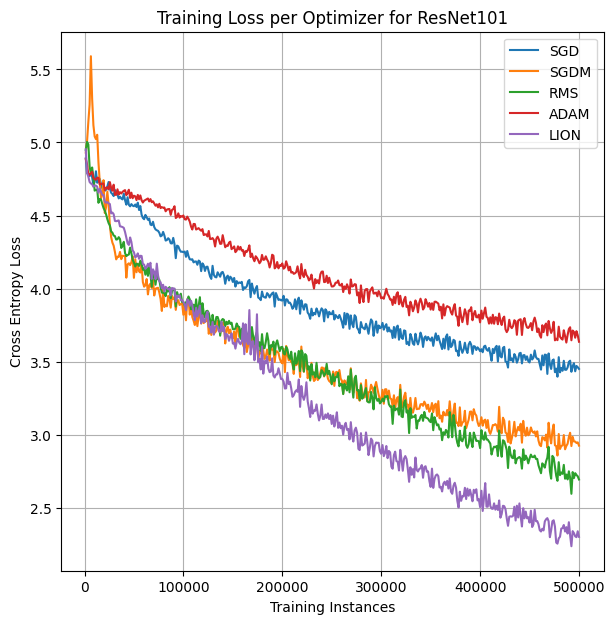

In [19]:
#Plot the training loss for each optimizer
fig, axs = plt.subplots(figsize=(7,7))
[axs.plot(a['trained_examples'], a['train_loss']) for a in results101]
axs.legend(optimizers)
axs.set_xlabel('Training Instances')
axs.set_ylabel('Cross Entropy Loss')
axs.grid()
axs.set_title("Training Loss per Optimizer for ResNet101")
fig.show()

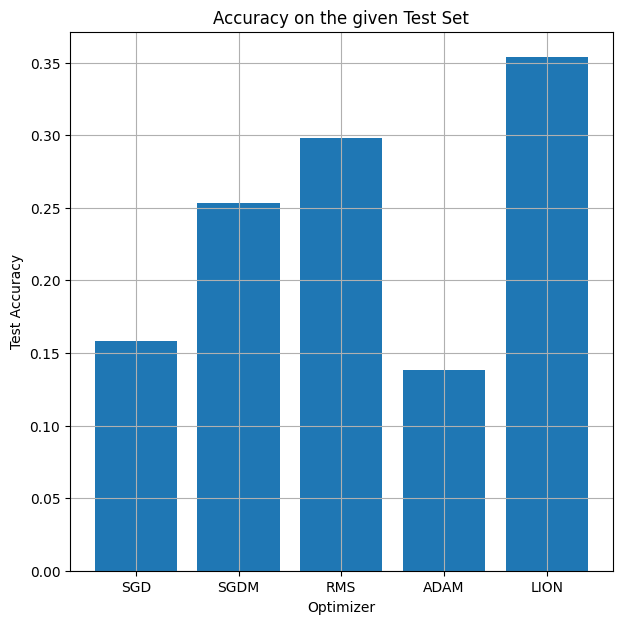

In [20]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['acc'] for a in results101])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Test Accuracy')
axs.grid()
axs.set_title("Accuracy on the given Test Set")
fig.show()

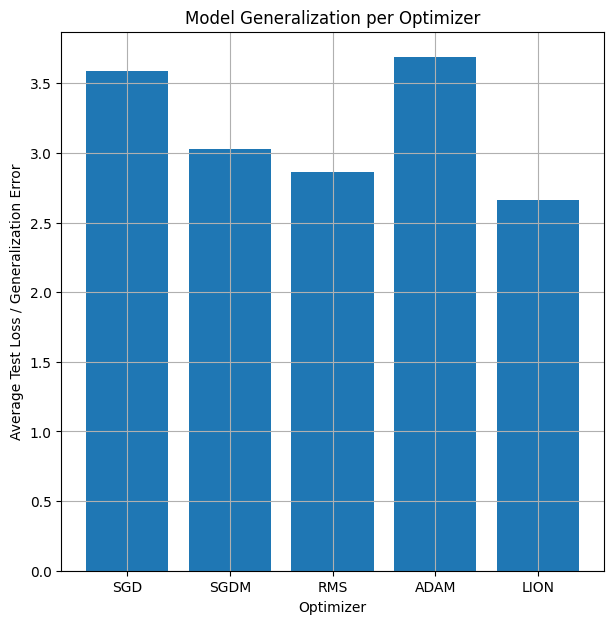

In [21]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(x=optimizers, height=[a['test_loss'] for a in results101])
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Test Loss / Generalization Error')
axs.grid()
axs.set_title("Model Generalization per Optimizer")
fig.show()

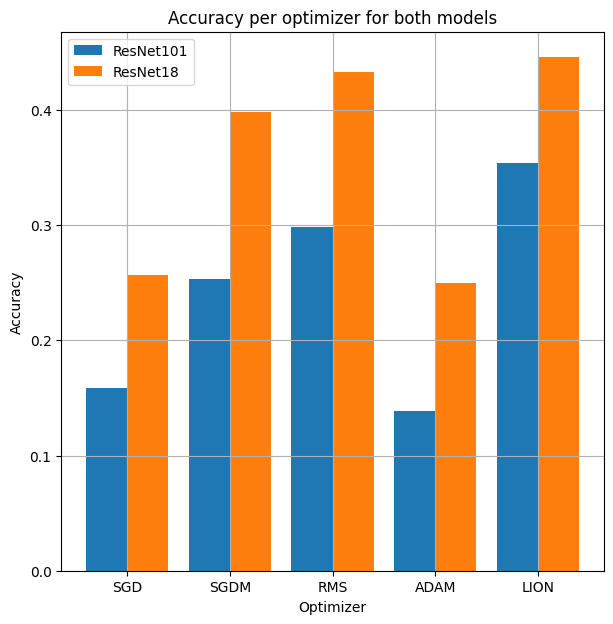

In [22]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(np.arange(len(optimizers)), [a['acc'] for a in results101], label='ResNet101', width=0.4)
axs.bar(np.arange(len(optimizers)) + 0.4, [a['acc'] for a in results18], label='ResNet18', width=0.4)
axs.set_xticks(np.arange(len(optimizers)) + 0.4 / 2, optimizers)
axs.set_xlabel('Optimizer')
axs.set_ylabel('Accuracy')
axs.grid()
axs.set_title("Accuracy per Optimizer for both models")
axs.legend()
fig.show()

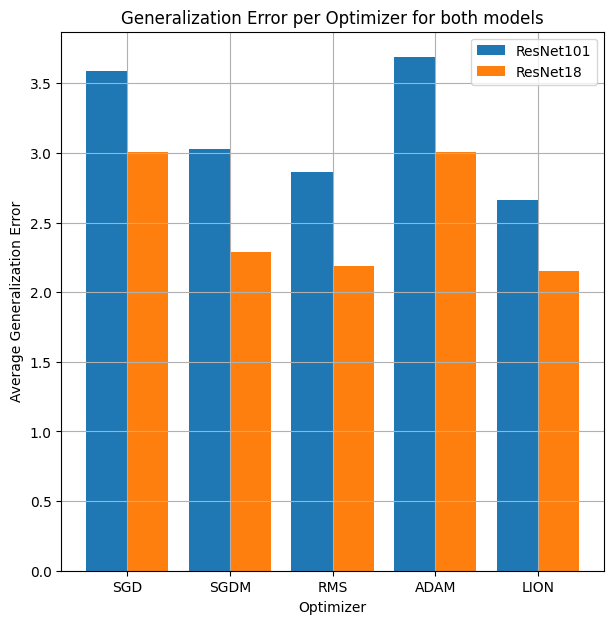

In [23]:
fig, axs = plt.subplots(figsize=(7,7))
axs.bar(np.arange(len(optimizers)), [a['test_loss'] for a in results101], label='ResNet101', width=0.4)
axs.bar(np.arange(len(optimizers)) + 0.4, [a['test_loss'] for a in results18], label='ResNet18', width=0.4)
axs.set_xticks(np.arange(len(optimizers)) + 0.4 / 2, optimizers)
axs.set_xlabel('Optimizer')
axs.set_ylabel('Average Generalization Error')
axs.grid()
axs.set_title("Generalization Error per Optimizer for both models")
axs.legend()
fig.show()